# Exploratory Data Analysis - Coordenadas
Formação dos servidores

#### Imports

## Load data

In [11]:
PATH = '../data/raw'

### Dados das coordenadas

In [12]:
# Edição manual no arquivo "escolas_enderecos_0.csv" na linha 25881, remoção do "campo" com 00E+91
data = pd.read_csv(os.path.join(PATH, 'escolas_enderecos_0.csv'), sep=',')
print(data.shape)
data.head()

(28730, 19)


,nomedep,depadm,mun,codmun,de,CD_ESCOLA,CD_DIRETORIA,CD_DIRETORIA_ESTADUAL,CD_DIRETORIA_SUPVS_PROPR,NM_COMPLETO_ESCOLA,CD_UNIDADE,DS_ENDERECO,COMPLEMENTO,NUMERO,CD_ORIGEM_UNIDADE,CD_ORIGEM_ESCOLA,CD_ORIGEM_ENDERECO,LATITUDE,LONGITUDE
0,ESTADUAL - SE,1,SAO PAULO,100,NORTE 1,36444,10101,10101,10101,GENESIO DE ALMEIDA MOURA DOUTOR,37806,DOMINGOS AREVALO,RUA,862,37806,36444,37866,-23.447000,-46.696700
1,ESTADUAL - SE,1,SAO PAULO,100,LESTE 5,1582,10205,10205,10205,DOMINGOS FAUSTINO SARMIENTO,24902,21 DE ABRIL,RUA,970,24902,1582,24962,-23.542232,-46.605793
2,ESTADUAL - SE,1,SAO PAULO,100,LESTE 5,2173,10205,10205,10205,JOAO BORGES PROFESSOR,24901,ITAPURA,RUA,976,24901,2173,24961,-23.547300,-46.566000
3,ESTADUAL - SE,1,SAO PAULO,100,LESTE 1,3086,10207,10207,10207,HELENA LOMBARDI BRAGA PROFESSORA,24918,VIRGINIA DE MIRANDA,RUA,138,24918,3086,24978,-23.526587,-46.452888
4,ESTADUAL - SE,1,SAO PAULO,100,LESTE 1,2884,10207,10207,10207,RAUL PILLA DEPUTADO,24923,RUA SAO BERTOLDO,RUA,449,24923,2884,24983,-23.494297,-46.457064


### Dados do SARESP das escolas (2018)

In [13]:
df_escolas = pd.read_csv('../data/processed/escolas_saresp_2018.csv')
print(df_escolas.shape)
df_escolas.head()

(20378, 14)


,DEPADM,DepBol,NomeDepBol,codRMet,CODESC,NOMESC,SERIE_ANO,cod_per,periodo,co_comp,ds_comp,medprof,PONTUACAO,DESEMPENHO
0,1,1,Rede Estadual,1,12,AYRES DE MOURA PROFESSOR,9º Ano EF,9,GERAL,1,LÍNGUA PORTUGUESA,263.1,BASICO,RUIM
1,1,1,Rede Estadual,1,12,AYRES DE MOURA PROFESSOR,9º Ano EF,9,GERAL,2,MATEMÁTICA,272.3,BASICO,RUIM
2,1,1,Rede Estadual,1,24,GAVIAO PEIXOTO BRIGADEIRO,3º Ano EF,9,GERAL,1,LÍNGUA PORTUGUESA,170.4,BASICO,RUIM
3,1,1,Rede Estadual,1,24,GAVIAO PEIXOTO BRIGADEIRO,3º Ano EF,9,GERAL,2,MATEMÁTICA,181.5,BASICO,RUIM
4,1,1,Rede Estadual,1,24,GAVIAO PEIXOTO BRIGADEIRO,5º Ano EF,9,GERAL,1,LÍNGUA PORTUGUESA,207.9,ADEQUADO,BOM


## Estatísticas básicas

In [14]:
data.select_dtypes('object').describe()

,nomedep,mun,de,NM_COMPLETO_ESCOLA,DS_ENDERECO,COMPLEMENTO,NUMERO
count,28730,28730,28730,28730,28720,27026,28730
unique,5,645,91,26677,21362,826,3137
top,MUNICIPAL,SAO PAULO,CENTRO OESTE,INSTITUTO BRASILEIRO DE EDUCACAO PROFISSIONAL ...,RUA DUQUE DE CAXIAS,RUA,SN
freq,13184,6926,991,15,36,19430,3240


## Filtrar apenas escolas estaduais 

In [15]:
data['nomedep'].unique()

array(['ESTADUAL - SE', 'MUNICIPAL', 'PRIVADA', 'ESTADUAL - OUTROS',
       'FEDERAL'], dtype=object)

In [16]:
data = data[data['nomedep'].isin(['ESTADUAL - SE', 'ESTADUAL - OUTROS'])]

## Juntar dados georrefenciados com desempenho das escolas (SARESP)

In [17]:
print('Quantidade de linhas', data.shape[0])
print('Valores unicos', data['CD_ESCOLA'].nunique())

Quantidade de linhas 6354
Valores unicos 6074


In [18]:
data = data.drop_duplicates(subset=['CD_ESCOLA'])

In [19]:
df_escolas_5_mat = df_escolas[(df_escolas['SERIE_ANO'] == '5º Ano EF') & (df_escolas['ds_comp'] == 'MATEMÁTICA')]

In [20]:
df_escolas_5_mat.shape

(1460, 14)

In [21]:
df_escolas_5_mat = pd.merge(data, df_escolas_5_mat, left_on='CD_ESCOLA', right_on=['CODESC'], how='inner')

In [22]:
df_escolas_5_mat.shape

(1460, 33)

### Analise do desempenho por localizacao

In [23]:
filtro_DEs = df_escolas_5_mat['de'].isin(df_escolas_5_mat['de'].value_counts().head(43).index)
df_escolas_5_mat[filtro_DEs].head()

,nomedep,depadm,mun,codmun,de,CD_ESCOLA,CD_DIRETORIA,CD_DIRETORIA_ESTADUAL,CD_DIRETORIA_SUPVS_PROPR,NM_COMPLETO_ESCOLA,CD_UNIDADE,DS_ENDERECO,COMPLEMENTO,NUMERO,CD_ORIGEM_UNIDADE,CD_ORIGEM_ESCOLA,CD_ORIGEM_ENDERECO,LATITUDE,LONGITUDE,DEPADM,DepBol,NomeDepBol,codRMet,CODESC,NOMESC,SERIE_ANO,cod_per,periodo,co_comp,ds_comp,medprof,PONTUACAO,DESEMPENHO
0,ESTADUAL - SE,1,SAO PAULO,100,NORTE 1,36444,10101,10101,10101,GENESIO DE ALMEIDA MOURA DOUTOR,37806,DOMINGOS AREVALO,RUA,862,37806,36444,37866,-23.447000,-46.696700,1,1,Rede Estadual,1,36444,GENESIO DE ALMEIDA MOURA DOUTOR,5º Ano EF,9,GERAL,2,MATEMÁTICA,181.6,BASICO,RUIM
1,ESTADUAL - SE,1,SAO PAULO,100,LESTE 5,1582,10205,10205,10205,DOMINGOS FAUSTINO SARMIENTO,24902,21 DE ABRIL,RUA,970,24902,1582,24962,-23.542232,-46.605793,1,1,Rede Estadual,1,1582,DOMINGOS FAUSTINO SARMIENTO,5º Ano EF,9,GERAL,2,MATEMÁTICA,218.3,BASICO,RUIM
2,ESTADUAL - SE,1,SAO PAULO,100,CENTRO SUL,4388,10316,10316,10316,SEMINARIO NOSSA SENHORA DA GLORIA,37397,RUA MOREIRA DE GODOI,RUA,399,37397,4388,37457,-23.591604,-46.609698,1,1,Rede Estadual,1,4388,SEMINARIO NOSSA SENHORA DA GLORIA,5º Ano EF,9,GERAL,2,MATEMÁTICA,218.7,BASICO,RUIM
3,ESTADUAL - SE,1,SAO PAULO,100,CENTRO SUL,4424,10316,10316,10316,FRANCISCO DE ASSIS REYS,18610,RUA BOM PASTOR,RUA,1560,18610,4424,18670,-23.590326,-46.607238,1,1,Rede Estadual,1,4424,FRANCISCO DE ASSIS REYS,5º Ano EF,9,GERAL,2,MATEMÁTICA,252.4,ADEQUADO,BOM
4,ESTADUAL - SE,1,SAO PAULO,100,CENTRO SUL,1739,10316,10316,10316,ANDRE DREYFUS PROFESSOR,12296,RUA PEDRO DE GODOI,RUA,170,12296,1739,12356,-23.587969,-46.582752,1,1,Rede Estadual,1,1739,ANDRE DREYFUS PROFESSOR,5º Ano EF,9,GERAL,2,MATEMÁTICA,227.6,ADEQUADO,BOM


In [24]:
df_desempenho_de = df_escolas_5_mat.groupby('de')['DESEMPENHO'].value_counts(normalize=True).unstack()
df_desempenho_de = (df_desempenho_de.fillna(0) * 100).round(1)
df_desempenho_de

DESEMPENHO,BOM,RUIM
de,,
AMERICANA,87.5,12.5
APIAI,30.0,70.0
ARARAQUARA,85.0,15.0
ASSIS,60.0,40.0
BAURU,60.0,40.0
...,...,...
TABOAO DA SERRA,22.2,77.8
TAQUARITINGA,93.8,6.2
TUPA,76.9,23.1


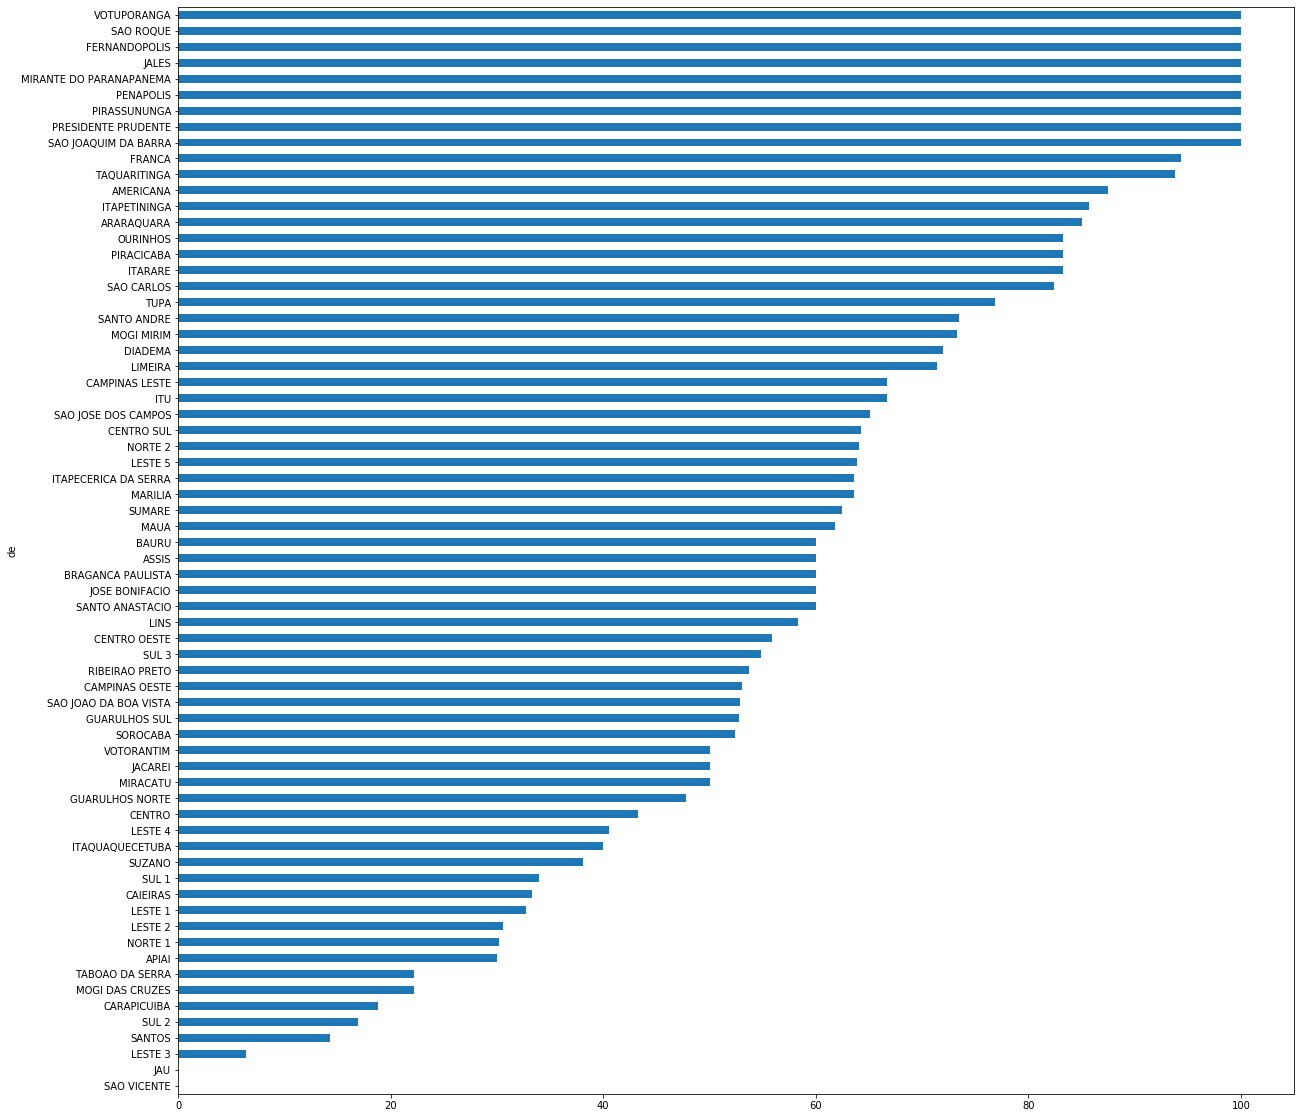

In [25]:
df_desempenho_de.sort_values('BOM')['BOM'].plot(kind='barh',figsize=(20,20))

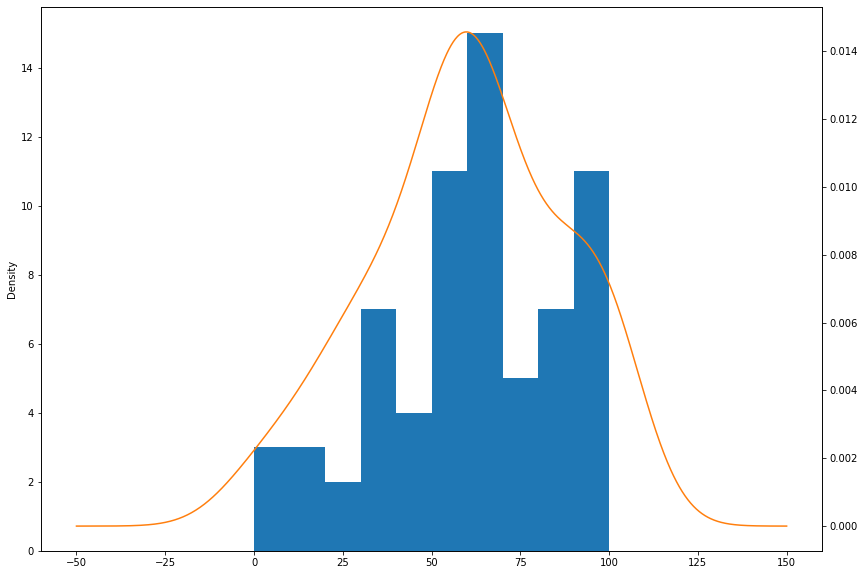

In [26]:
fig, ax = plt.subplots()
df_desempenho_de['BOM'].plot(kind='hist', bins=10, figsize=(14,10), ax=ax)
df_desempenho_de['BOM'].plot(kind='kde', ax=ax, secondary_y=True)

## Análise Geoespacial

### Leitura do shapefile de São Paulo
Dados de: http://www.usp.br/nereus/?dados=unidades-federativas

In [27]:
# http://www.usp.br/nereus/?dados=unidades-federativas
gdf_sp = gpd.read_file('../data/external/SP-MUN')

### Criação dos pontos georreferenciados

In [28]:
data['Points'] = data.apply(lambda x: Point(x['LONGITUDE'], x['LATITUDE']), axis=1)

In [29]:
gdf_points = gpd.GeoDataFrame(data, geometry='Points')

## Visualização das escolas no mapa

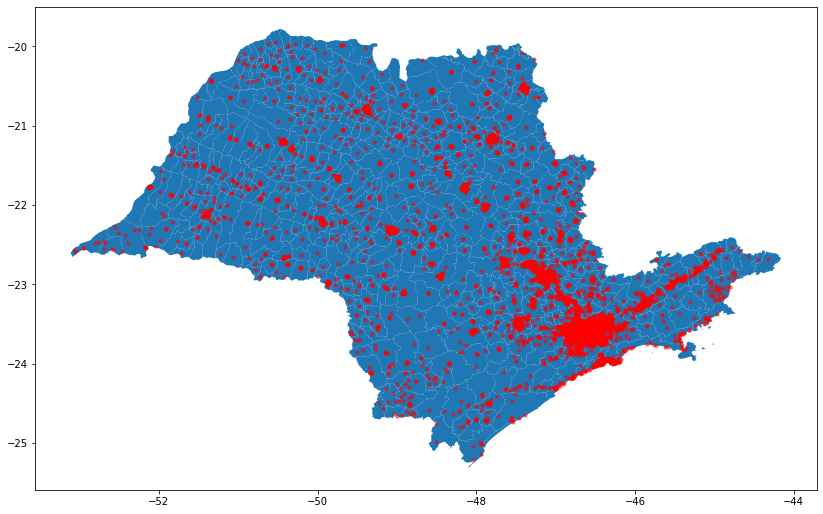

In [30]:
ax = gdf_sp.plot(figsize=(14, 18))
gdf_points.plot(ax=ax, markersize=10, color='red', alpha=0.5)
plt.show()

### Analise georreferenciada do desempenho escolar 

In [73]:
df_escolas_5_mat['Points'] = df_escolas_5_mat.apply(lambda x: Point(x['LONGITUDE'], x['LATITUDE']), axis=1)
gdf_escolas_5_mat = gpd.GeoDataFrame(df_escolas_5_mat, geometry='Points')

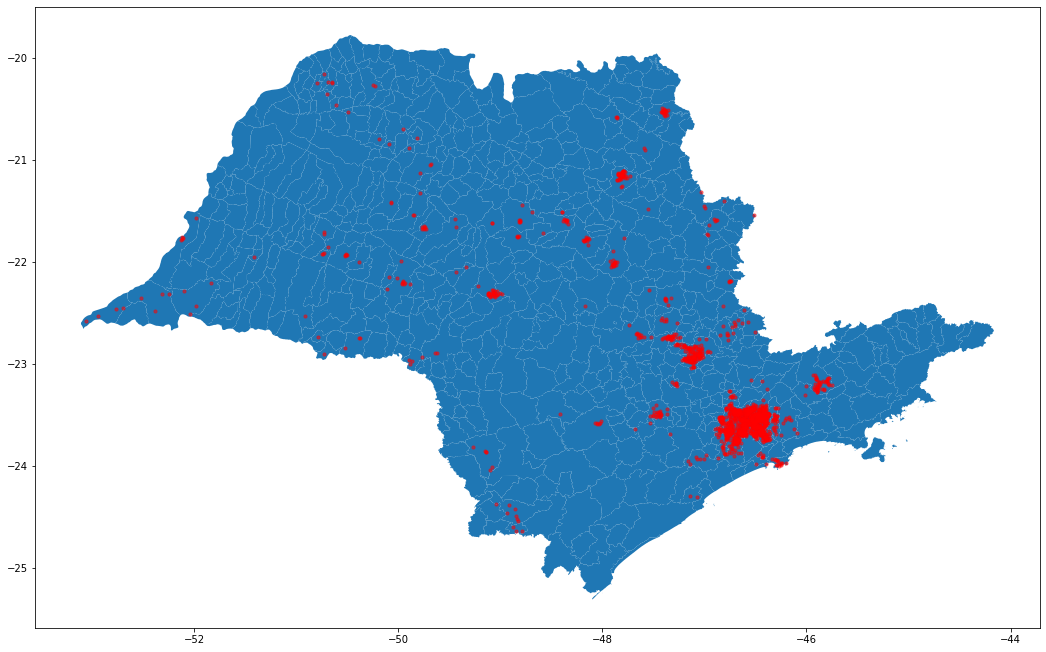

In [32]:
ax = gdf_sp.plot(figsize=(18, 15))
gdf_escolas_5_mat.plot(ax=ax, markersize=10, color='red', alpha=0.5)
plt.show()

In [33]:
gdf_escolas_5_mat['DESEMPENHO'].value_counts(normalize=True)

BOM     0.522603
RUIM    0.477397
Name: DESEMPENHO, dtype: float64

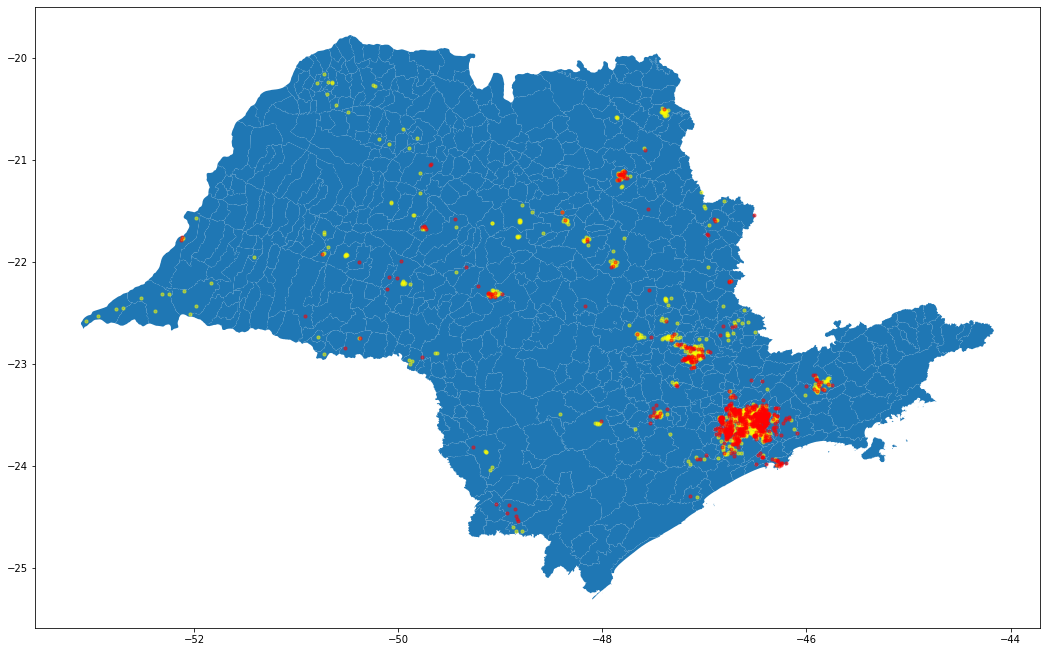

In [34]:
ax = gdf_sp.plot(figsize=(18, 15))
gdf_escolas_5_mat[gdf_escolas_5_mat['DESEMPENHO'] == 'BOM'].plot(ax=ax, markersize=10, color='yellow', alpha=0.5)
gdf_escolas_5_mat[gdf_escolas_5_mat['DESEMPENHO'] == 'RUIM'].plot(ax=ax, markersize=10, color='red', alpha=0.5)
plt.show()

In [36]:
data.head()

,nomedep,depadm,mun,codmun,de,CD_ESCOLA,CD_DIRETORIA,CD_DIRETORIA_ESTADUAL,CD_DIRETORIA_SUPVS_PROPR,NM_COMPLETO_ESCOLA,CD_UNIDADE,DS_ENDERECO,COMPLEMENTO,NUMERO,CD_ORIGEM_UNIDADE,CD_ORIGEM_ESCOLA,CD_ORIGEM_ENDERECO,LATITUDE,LONGITUDE,Points
0,ESTADUAL - SE,1,SAO PAULO,100,NORTE 1,36444,10101,10101,10101,GENESIO DE ALMEIDA MOURA DOUTOR,37806,DOMINGOS AREVALO,RUA,862,37806,36444,37866,-23.447000,-46.696700,POINT (-46.69670 -23.44700)
1,ESTADUAL - SE,1,SAO PAULO,100,LESTE 5,1582,10205,10205,10205,DOMINGOS FAUSTINO SARMIENTO,24902,21 DE ABRIL,RUA,970,24902,1582,24962,-23.542232,-46.605793,POINT (-46.60579 -23.54223)
2,ESTADUAL - SE,1,SAO PAULO,100,LESTE 5,2173,10205,10205,10205,JOAO BORGES PROFESSOR,24901,ITAPURA,RUA,976,24901,2173,24961,-23.547300,-46.566000,POINT (-46.56600 -23.54730)
3,ESTADUAL - SE,1,SAO PAULO,100,LESTE 1,3086,10207,10207,10207,HELENA LOMBARDI BRAGA PROFESSORA,24918,VIRGINIA DE MIRANDA,RUA,138,24918,3086,24978,-23.526587,-46.452888,POINT (-46.45289 -23.52659)
4,ESTADUAL - SE,1,SAO PAULO,100,LESTE 1,2884,10207,10207,10207,RAUL PILLA DEPUTADO,24923,RUA SAO BERTOLDO,RUA,449,24923,2884,24983,-23.494297,-46.457064,POINT (-46.45706 -23.49430)


In [37]:
from sklearn.cluster import KMeans

In [113]:
kmeans = KMeans(n_clusters=20, n_jobs=-1)

In [114]:
df_coordenadas = gdf_escolas_5_mat[['LONGITUDE', 'LATITUDE']]

In [115]:
clusters = kmeans.fit_predict(df_coordenadas)

In [116]:
df_result = pd.concat([gdf_escolas_5_mat, pd.Series(clusters, name='CLUSTER')], axis=1)
df_result.head()

,nomedep,depadm,mun,codmun,de,CD_ESCOLA,CD_DIRETORIA,CD_DIRETORIA_ESTADUAL,CD_DIRETORIA_SUPVS_PROPR,NM_COMPLETO_ESCOLA,CD_UNIDADE,DS_ENDERECO,COMPLEMENTO,NUMERO,CD_ORIGEM_UNIDADE,CD_ORIGEM_ESCOLA,CD_ORIGEM_ENDERECO,LATITUDE,LONGITUDE,DEPADM,DepBol,NomeDepBol,codRMet,CODESC,NOMESC,SERIE_ANO,cod_per,periodo,co_comp,ds_comp,medprof,PONTUACAO,DESEMPENHO,Points,CLUSTER
0,ESTADUAL - SE,1,SAO PAULO,100,NORTE 1,36444,10101,10101,10101,GENESIO DE ALMEIDA MOURA DOUTOR,37806,DOMINGOS AREVALO,RUA,862,37806,36444,37866,-23.447000,-46.696700,1,1,Rede Estadual,1,36444,GENESIO DE ALMEIDA MOURA DOUTOR,5º Ano EF,9,GERAL,2,MATEMÁTICA,181.6,BASICO,RUIM,POINT (-46.69670 -23.44700),12
1,ESTADUAL - SE,1,SAO PAULO,100,LESTE 5,1582,10205,10205,10205,DOMINGOS FAUSTINO SARMIENTO,24902,21 DE ABRIL,RUA,970,24902,1582,24962,-23.542232,-46.605793,1,1,Rede Estadual,1,1582,DOMINGOS FAUSTINO SARMIENTO,5º Ano EF,9,GERAL,2,MATEMÁTICA,218.3,BASICO,RUIM,POINT (-46.60579 -23.54223),12
2,ESTADUAL - SE,1,SAO PAULO,100,CENTRO SUL,4388,10316,10316,10316,SEMINARIO NOSSA SENHORA DA GLORIA,37397,RUA MOREIRA DE GODOI,RUA,399,37397,4388,37457,-23.591604,-46.609698,1,1,Rede Estadual,1,4388,SEMINARIO NOSSA SENHORA DA GLORIA,5º Ano EF,9,GERAL,2,MATEMÁTICA,218.7,BASICO,RUIM,POINT (-46.60970 -23.59160),12
3,ESTADUAL - SE,1,SAO PAULO,100,CENTRO SUL,4424,10316,10316,10316,FRANCISCO DE ASSIS REYS,18610,RUA BOM PASTOR,RUA,1560,18610,4424,18670,-23.590326,-46.607238,1,1,Rede Estadual,1,4424,FRANCISCO DE ASSIS REYS,5º Ano EF,9,GERAL,2,MATEMÁTICA,252.4,ADEQUADO,BOM,POINT (-46.60724 -23.59033),12
4,ESTADUAL - SE,1,SAO PAULO,100,CENTRO SUL,1739,10316,10316,10316,ANDRE DREYFUS PROFESSOR,12296,RUA PEDRO DE GODOI,RUA,170,12296,1739,12356,-23.587969,-46.582752,1,1,Rede Estadual,1,1739,ANDRE DREYFUS PROFESSOR,5º Ano EF,9,GERAL,2,MATEMÁTICA,227.6,ADEQUADO,BOM,POINT (-46.58275 -23.58797),12


In [136]:
df_result['CLUSTER'] = df_result['CLUSTER'].astype(str)

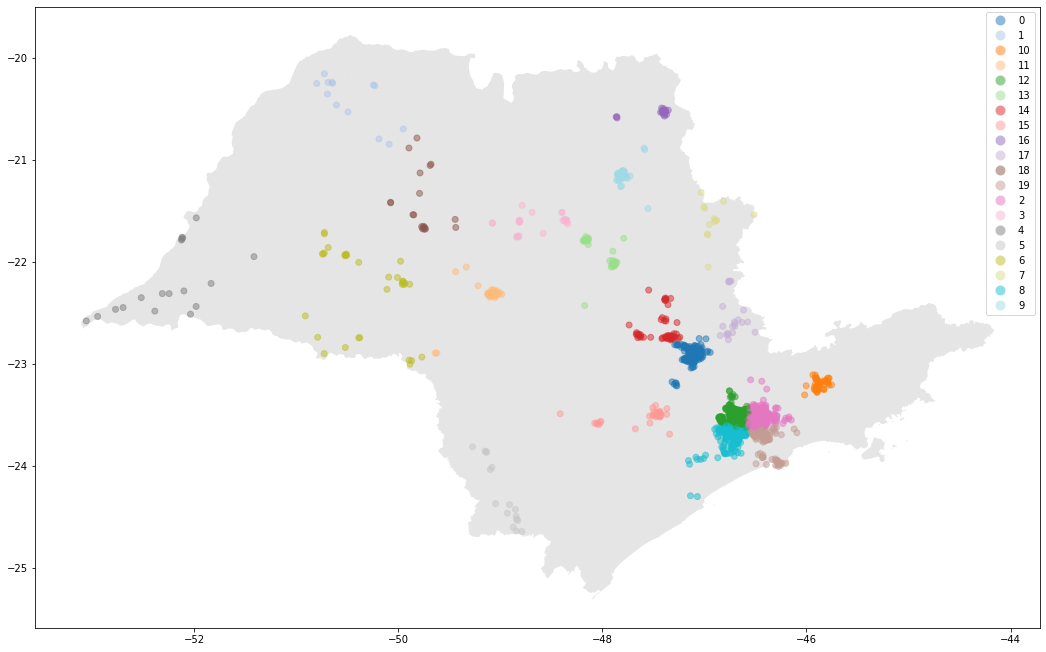

In [137]:
ax = gdf_sp.plot(figsize=(18, 15), color='gray', alpha=0.2)
df_result.plot(column='CLUSTER', cmap='tab20', figsize=(18, 15), ax=ax, alpha=0.5, legend=True)
plt.show()

In [138]:
df_desempenho_cluster = df_result.groupby(['CLUSTER'])['DESEMPENHO'].value_counts(normalize=True).unstack().fillna(0)
df_desempenho_cluster

DESEMPENHO,BOM,RUIM
CLUSTER,,
0,0.593750,0.406250
1,1.000000,0.000000
10,0.644444,0.355556
11,0.625000,0.375000
12,0.453390,0.546610
13,0.800000,0.200000
14,0.860000,0.140000
15,0.612903,0.387097
16,0.952381,0.047619


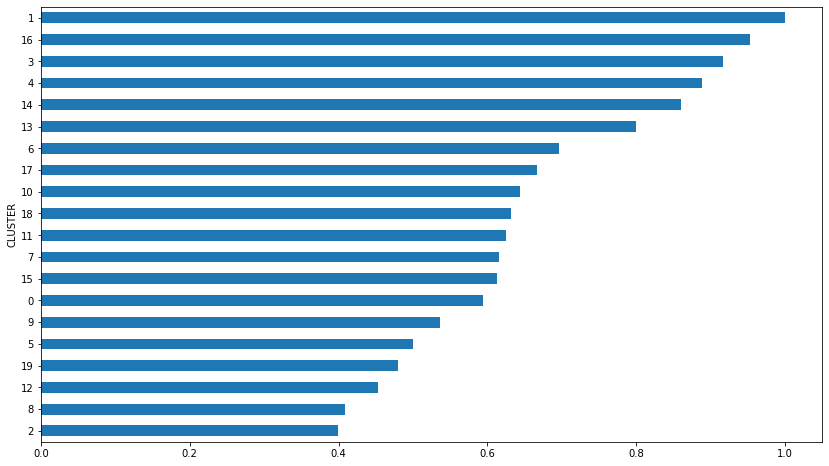

In [139]:
df_desempenho_cluster.sort_values('BOM')['BOM'].plot(kind='barh', figsize=(14,8))

## Exportar dados

In [142]:
df_result.to_csv('../data/processed/localizacao.csv', index=False)